### SVM Modelling

In [134]:
from sklearn.svm import SVC

In [135]:
model = SVC()

In [136]:
model.fit(X_train_scaled,y_train)

SVC()

In [137]:
predictions = model.predict(X_test_scaled)


In [138]:
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  33  442]
 [   9 4035]]


              precision    recall  f1-score   support

           0       0.79      0.07      0.13       475
           1       0.90      1.00      0.95      4044

    accuracy                           0.90      4519
   macro avg       0.84      0.53      0.54      4519
weighted avg       0.89      0.90      0.86      4519



In [140]:
#use GridSearchCV to find the best parameters to run a SVM model

from sklearn.model_selection import GridSearchCV

In [141]:
#apply follow test parameters for C and gamma

param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [142]:
#creating the model

grid = GridSearchCV(SVC(), param_grid,verbose=3)

In [143]:
#process the various parameters using GridSearchCV

grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.888 total time=   4.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.888 total time=   3.8s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.888 total time=   3.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.888 total time=   4.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.888 total time=   3.9s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.888 total time=   4.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.888 total time=   3.6s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.888 total time=   3.4s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.888 total time=   3.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.888 total time=   3.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.888 total time=   2.8s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.924 total time=  11.6s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.929 total time=  12.9s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.917 total time=  11.5s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.924 total time=  11.9s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.904 total time=   9.5s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.908 total time=   9.8s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.904 total time=   9.6s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.903 total time=   8.9s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.904 total time=   8.7s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.888 total time=   8.5s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.888 total time=   9.3s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.888 total time=   8.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [144]:
#identify the best parmaters from the above GridSearchCV

grid.best_params_

{'C': 1000, 'gamma': 1}

In [145]:
#identify the best estimators from the GridSearchCV

grid.best_estimator_

SVC(C=1000, gamma=1)

In [146]:
#apply the test dataset into the model

grid_predictions = grid.predict(X_test_scaled)

In [147]:
#display the confusion matrix and the classification report from the model results

print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 323  152]
 [ 131 3913]]


              precision    recall  f1-score   support

           0       0.71      0.68      0.70       475
           1       0.96      0.97      0.97      4044

    accuracy                           0.94      4519
   macro avg       0.84      0.82      0.83      4519
weighted avg       0.94      0.94      0.94      4519



By applying the best parameters the model was able to significant approve on the Logistical Regression model.

**Confusion Matrix**

the diagonal top right to bottom left is the false negatives and false positives

the opposite top left to bottom right is the true positives and true negatives (correct values)

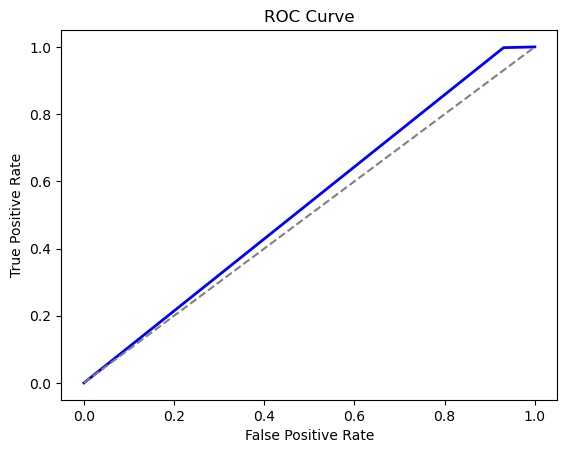

In [148]:
fpr, tpr, _ = roc_curve(y_test,predictions)  #predictions are the values generated from SVM model

plt.figure()
plt.plot(fpr, tpr, color='b', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()




The ROC curve is visible when compared against the Logistical regression ROC curve